# Ćwiczenie 1 -  dodatkowy magazyn, podaż większa niż zapotrzebowanie barów

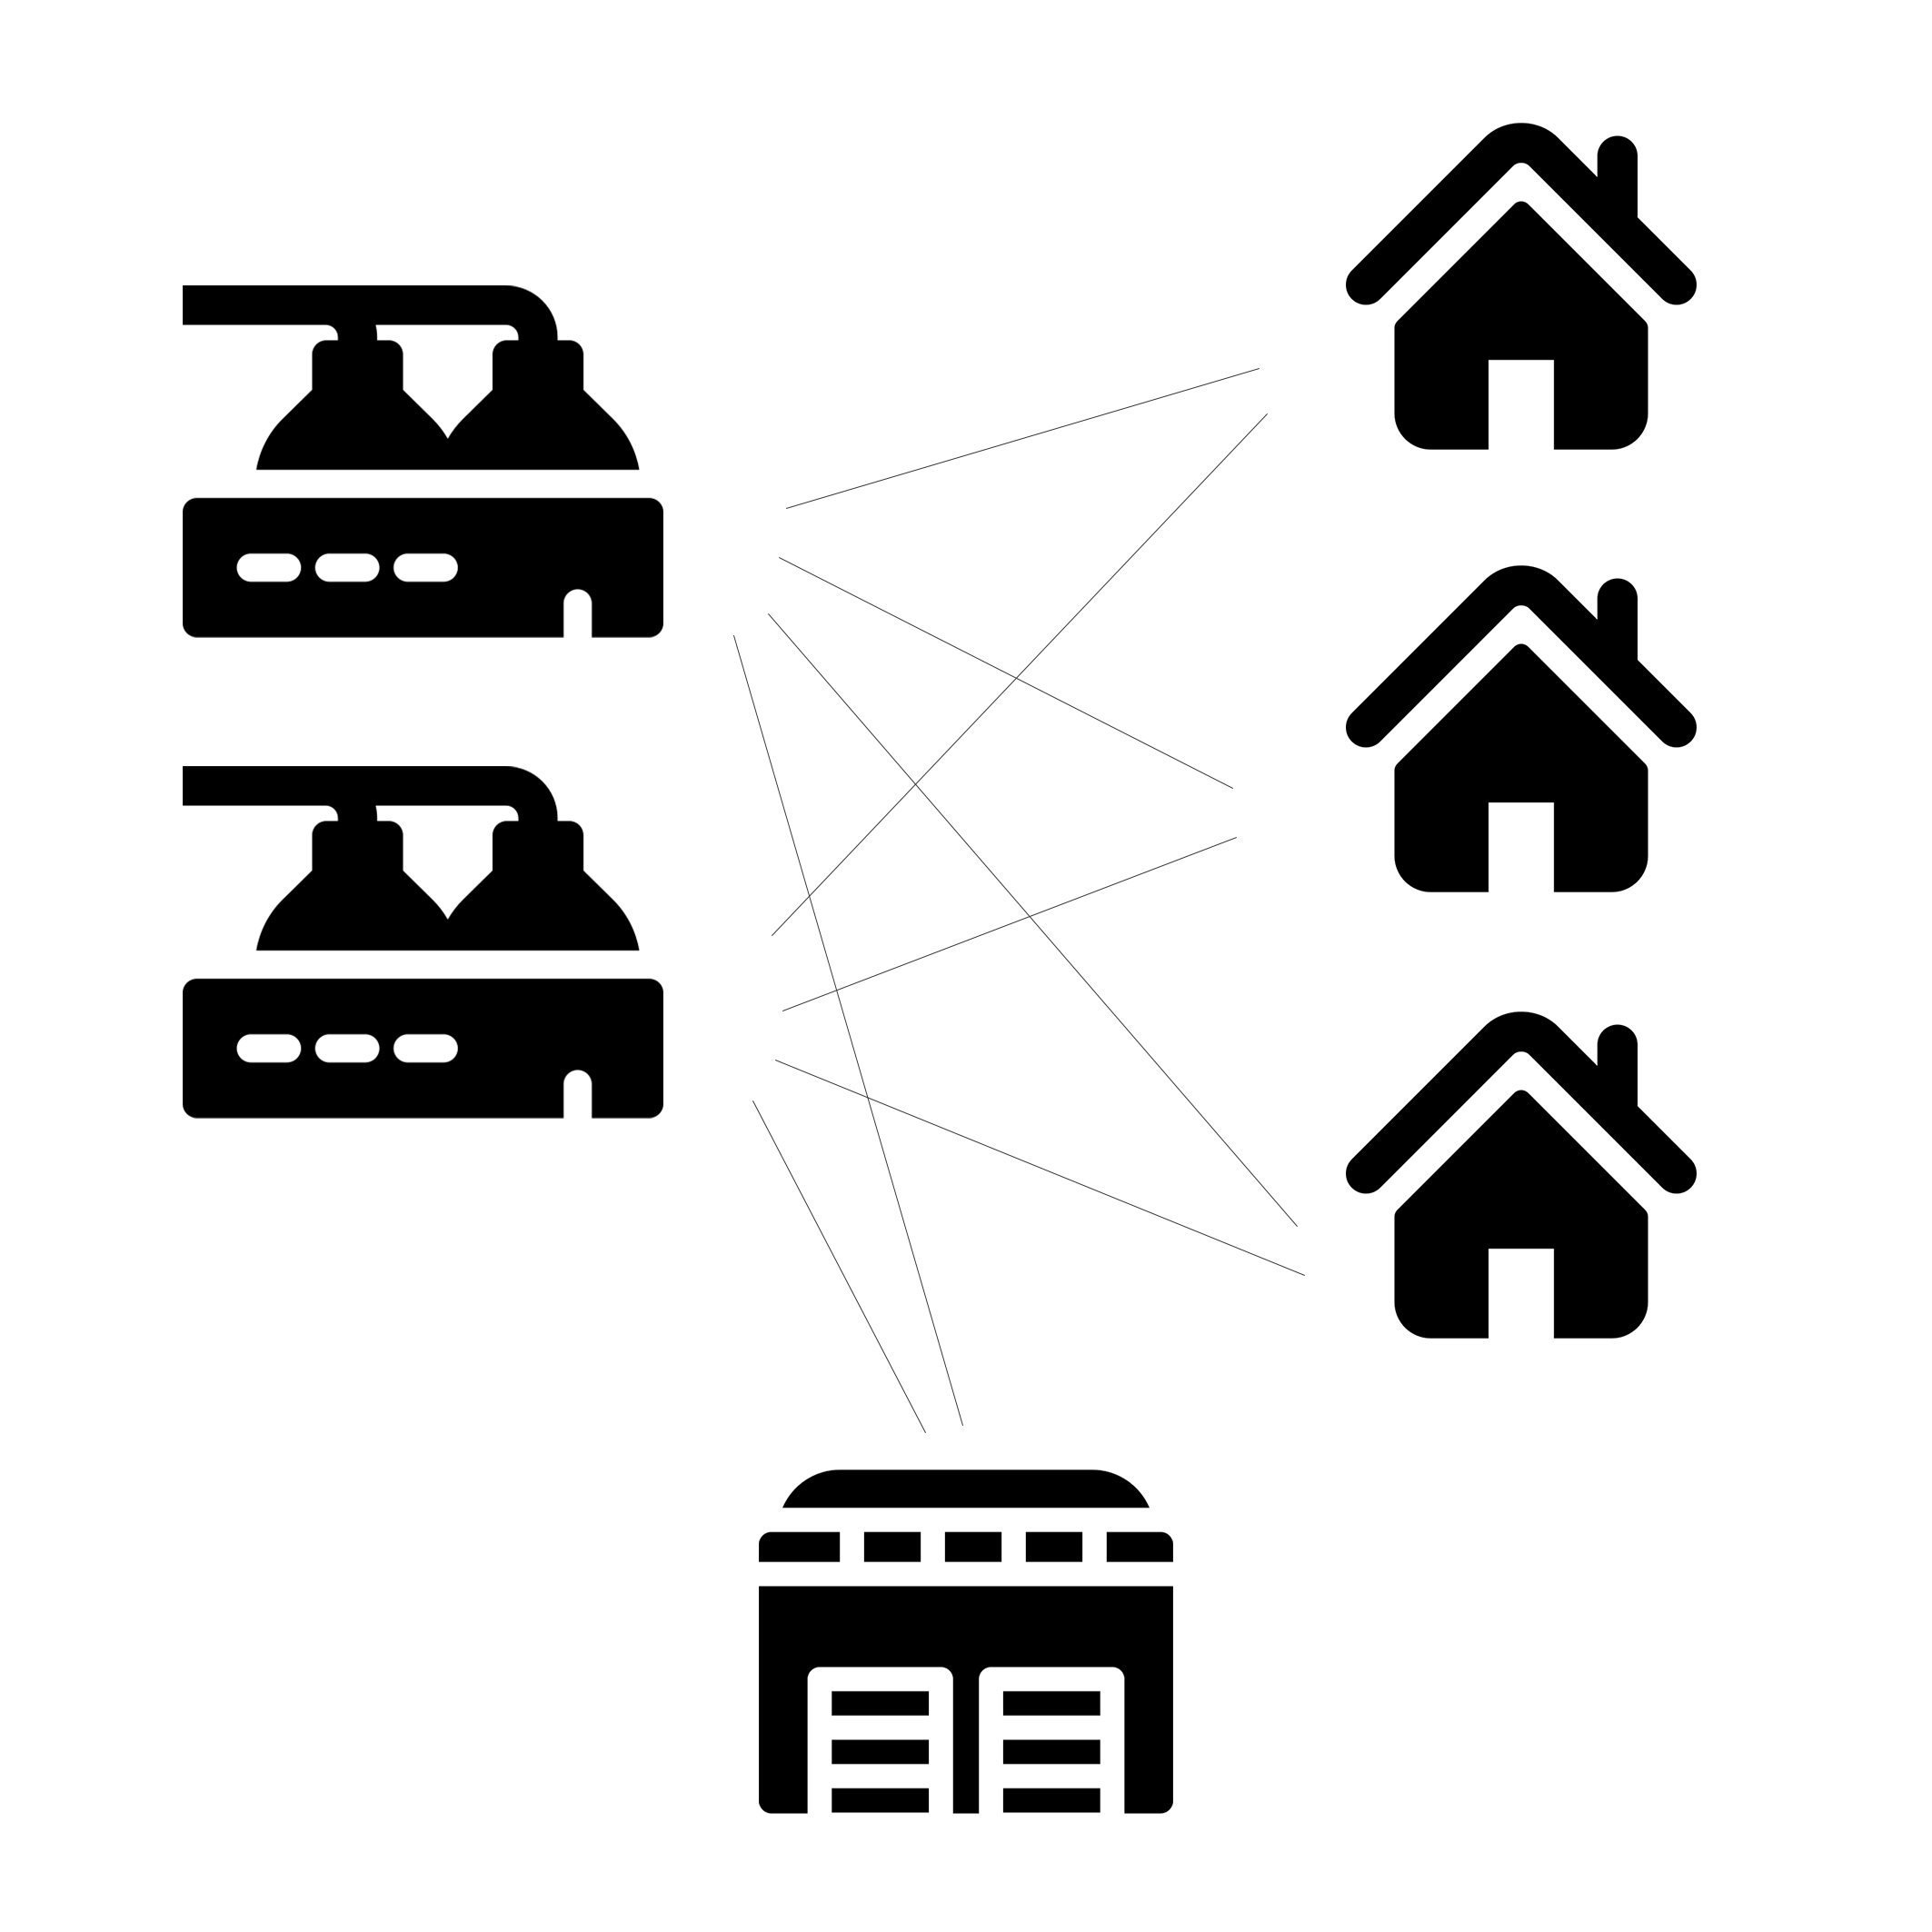

In [2]:
from pulp import *
prob = LpProblem("Problem",LpMinimize)
xb=LpVariable("Xb",0,20,LpInteger) #z browaru x do baru bułka
xp=LpVariable("Xp",0,20,LpInteger) #z browaru x do baru pewex
xk=LpVariable("Xk",0,20,LpInteger) #z browaru x do baru kebab
xm=LpVariable("Xm",0,20,LpInteger) #z browaru x do magazynu
yb=LpVariable("Yb",0,20,LpInteger) #z browaru y do baru bułka
yp=LpVariable("Yp",0,20,LpInteger) #z browaru y do baru pewex
yk=LpVariable("Yk",0,20,LpInteger) #z browaru y do baru kebab
ym=LpVariable("Ym",0,20,LpInteger) #z browaru y do magazynu

prob+=15*xb+10*xp+5*xk+0*xm+2*yb+15*yp+20*yk+0*ym, "Suma kosztow"
prob+=xb+yb==19
prob+=xp+yp==5
prob+=xk+yk==10
prob+=xb+xp+xk+xm==20
prob+=yb+yp+yk+ym==20


prob.solve()
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    if v.varValue != 0:
            print(v.name, "=", v.varValue)
print("Suma kosztów", value(prob.objective))

Status: Optimal
Xk = 10.0
Xm = 5.0
Xp = 5.0
Yb = 19.0
Ym = 1.0
Suma kosztów 138.0


# Ćwiczenie 2 - wirtualny browar, zapotrzebowanie barów większe niż podaż

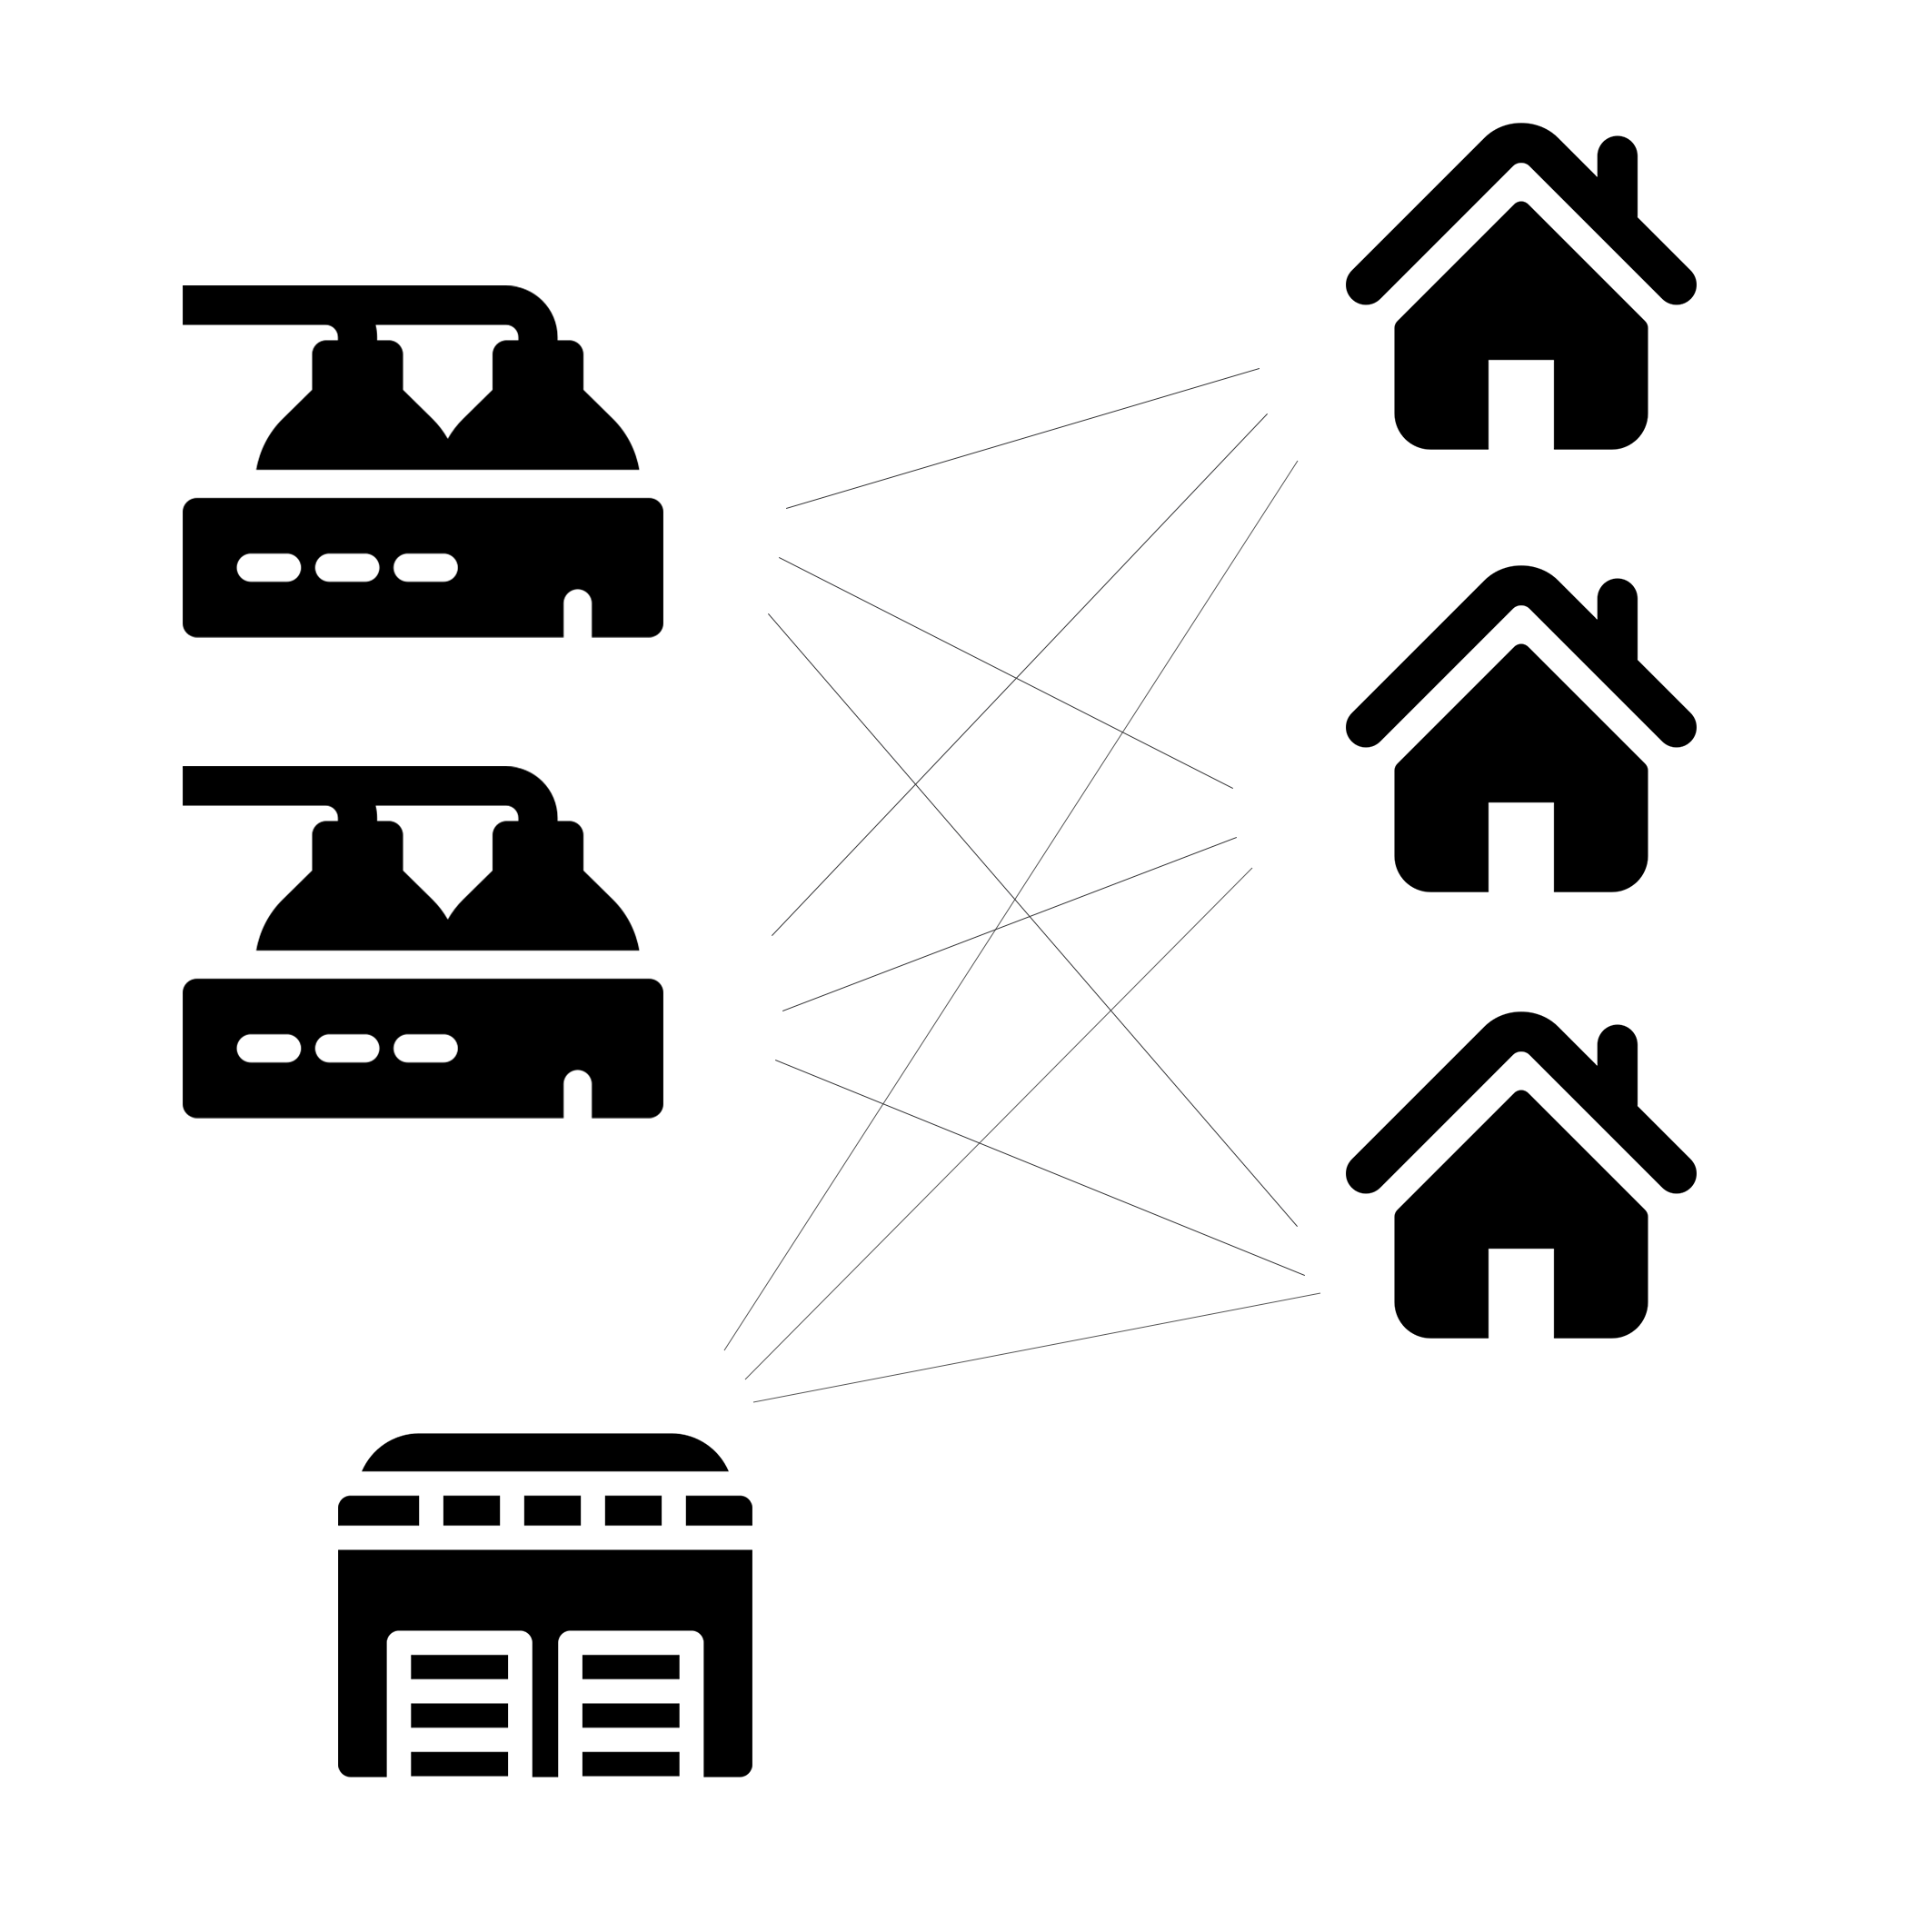

# Inicjalizacja problemu, określenie zmiennych decyzyjnych i ich ograniczeń, określenie funkcji celu, rozwiązanie problemu i podanie wyniku wraz ze statusem

In [3]:
prob = LpProblem("Problem",LpMinimize)
xb=LpVariable("Xb",0,10,LpInteger)#z browaru x do baru bułka
xp=LpVariable("Xp",0,10,LpInteger)#z browaru x do baru pewex
xk=LpVariable("Xk",0,10,LpInteger)#z browaru x do baru kebab
yb=LpVariable("Yb",0,20,LpInteger)#z browaru y do baru bułka
yp=LpVariable("Yp",0,20,LpInteger)#z browaru y do baru pewex
yk=LpVariable("Yk",0,20,LpInteger)#z browaru y do baru kebab
zb=LpVariable("Zb",0,None,LpInteger)#z browaru wirtualnego do baru bułka
zp=LpVariable("Zp",0,None,LpInteger)#z browaru wirutalnego do baru pewex
zk=LpVariable("Zk",0,None,LpInteger)#z browaru wirtualnego do baru kebab

prob+=15*xb+10*xp+5*xk+2*yb+15*yp+20*yk+1000*zb+1000*zp+1000*zk, "Suma kosztow"
prob+=xb+yb+zb==19
prob+=xp+yp+zp==5
prob+=xk+yk+zk==10
prob+=xb+xp+xk==10
prob+=yb+yp+yk==20
prob+=zp+zb+zk>=0


prob.solve()
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    if v.varValue != 0:
            print(v.name, "=", v.varValue)

print("Suma kosztów", value(prob.objective)-(value(zp)*1000)-(value(zk)*1000)-(value(zb)*1000))

Status: Optimal
Xk = 10.0
Yb = 19.0
Yp = 1.0
Zp = 4.0
Suma kosztów 103.0


# Wypisanie zmiennych użytych do rozwiązania problemu

In [4]:
prob.variables()

[Xb, Xk, Xp, Yb, Yk, Yp, Zb, Zk, Zp]

# Wypisanie wartości zp (czyli ile butelek prejedzie z browaru wirtualnego do baru Pewex)

In [5]:
zp.varValue

4.0